 # Projet : Prédiction des résultats d'une campagne marketing en banque

#### Contexte : 
De nos jours, les dépenses de marketing dans le secteur bancaire sont massives, ce qui signifie qu'il est essentiel pour les banques d'optimiser les stratégies de marketing et d'améliorer leur efficacité. Comprendre les besoins des clients conduit à des plans marketing plus efficaces, à des conceptions de produits plus intelligentes et à une plus grande satisfaction client.

#### Objectifs principaux  :
Contruistre un algorithme pour prédire les réponses des clients aux futures campagnes de marketing.

Cela permettra à la banque de :
* développer une compréhension plus fine de sa clientèle
* prédire la réponse des clients à sa campagne de télémarketing
* établir un profil de clientèle cible pour les futurs plans de marketing.


### Première exploration du dataset

In [1]:
#Lecture du fichier 
import pandas as pd
import numpy as np
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
# Import des modules nécessaires
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from xgboost import plot_importance
import shap

In [3]:
#Taille du dataset
print('La taille du jeu de données est:', df.shape)
 
# Afficher les noms des colonnes
print(df.columns)

#Informations générales sur le data frame
print(df.info())

La taille du jeu de données est: (11162, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14 

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
# Trouver les valeurs manquantes dans le DataFrame
nan_values = df.isna().sum()

# Afficher le nombre de NaN pour chaque colonne
print(nan_values)

#Nombres de doublons
duplicates = df.duplicated().sum()
print(duplicates, ' doublons détectés')

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
0  doublons détectés


In [8]:
#affichage du nombre de valeurs par variable
print(df.nunique())

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64


In [9]:
#Identifier les variables catégorielles

# Obtenir les colonnes du DataFrame
columns = df.columns

# Identifier les variables catégorielles
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Afficher les noms des colonnes catégorielles
print("Colonnes catégorielles :")
for col in categorical_columns:
    print(col)

Colonnes catégorielles :
job
marital
education
default
housing
loan
contact
month
poutcome
deposit


In [10]:
#Identifier les variables numériques

# Obtenir les colonnes du DataFrame
columns = df.columns

# Identifier les variables numériques
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Afficher les noms des colonnes numériques
print("Colonnes numériques :")
for col in numeric_columns:
    print(col)

Colonnes numériques :
age
balance
day
duration
campaign
pdays
previous


In [11]:
#Connaître le nombre d'occurrence par valeur
# Sélectionner uniquement les colonnes numériques
num_columns = df.select_dtypes(include=['int', 'float']).columns
# Parcourir chaque colonne numérique pour obtenir les valeurs uniques et les compter
unique_counts_dict = {}
for col in num_columns:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    unique_counts_dict[col] = {
        'Valeurs uniques': unique_values,
        'Occurrences': value_counts
    }
# Afficher les valeurs uniques et le nombre d'occurrences pour chaque colonne numérique
for col, unique_counts in unique_counts_dict.items():
    print(f"Colonne '{col}':")
    print("Valeurs uniques:")
    print(unique_counts['Valeurs uniques'])
    print("Occurrences:")
    print(unique_counts['Occurrences'])
    print()  # Ajoute une ligne vide pour séparer les différentes colonnes

Colonne 'age':
Valeurs uniques:
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
Occurrences:
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64

Colonne 'balance':
Valeurs uniques:
[2343   45 1270 ... 1594 2593 -134]
Occurrences:
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dtype: int64

Colonne 'day':
Valeurs uniques:
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
Occurrences:
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7  

In [12]:
# Sélectionner uniquement les colonnes catégorielles
cat_columns = df.select_dtypes(include=['object']).columns
# Utiliser  la méthode value_counts() sur chaque colonne catégorielle
value_counts_dict = {}
for col in cat_columns:
    value_counts_dict[col] = df[col].value_counts()
# Afficher  les décomptes des valeurs pour chaque colonne catégorielle
for col, counts in value_counts_dict.items():
    print(f"Valeurs pour la colonne '{col}':")
    print(counts)
    print()  # Ajoute une ligne vide pour séparer les décomptes des différentes colonnes

Valeurs pour la colonne 'job':
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Valeurs pour la colonne 'marital':
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

Valeurs pour la colonne 'education':
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

Valeurs pour la colonne 'default':
no     10994
yes      168
Name: default, dtype: int64

Valeurs pour la colonne 'housing':
no     5881
yes    5281
Name: housing, dtype: int64

Valeurs pour la colonne 'loan':
no     9702
yes    1460
Name: loan, dtype: int64

Valeurs pour la colonne 'contact':
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

Valeurs pour la colonne 'month':
may    2824
au

Un dataset sans doublon ni valeurs manquantes.\
Cependant, un poids non négigeable de la modalité "Unknown" est identifié.\
Cela nécessitera un pré-traitement pour préparer la modélisation.

#### Statistiques - Etude des corrélations entre les variables

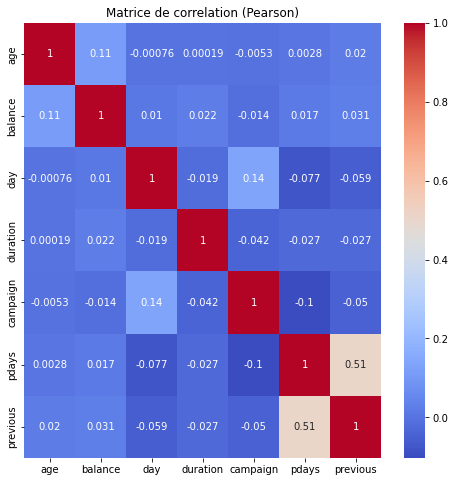

In [14]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm')
plt.title('Matrice de correlation (Pearson)');

In [15]:
# Tableau récap de chaque chi2
results = []

for i in range(len(cat_columns)):
    for j in range(i + 1, len(cat_columns)):
        table = pd.crosstab(df[cat_columns[i]], df[cat_columns[j]])
        test = chi2_contingency(table)
        statistic = test[0]
        p_value = test[1]
        degrees_freedom = test[2]
        results.append((cat_columns[i], cat_columns[j], statistic, p_value, degrees_freedom))

df_chi2 = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Statistique', 'p-value', 'Degrés de liberté'])
df_chi2

,Variable 1,Variable 2,Statistique,p-value,Degrés de liberté
0,job,marital,1255.174112,7.350992e-252,22
1,job,education,7191.109984,0.000000e+00,33
2,job,default,30.958977,1.118186e-03,11
3,job,housing,1075.428403,1.111623e-223,11
4,job,loan,213.772945,1.022322e-39,11
5,job,contact,752.185539,7.410439e-145,22
6,job,month,1392.946161,4.863150e-215,121
7,job,poutcome,259.455682,5.643094e-37,33
8,job,deposit,378.075256,2.741690e-74,11
9,marital,education,349.654798,1.830554e-72,6


In [16]:
import pandas as pd
from scipy.stats import chi2_contingency

results = []

for col in cat_columns:
    table = pd.crosstab(df[col], df['deposit'])
    test = chi2_contingency(table)
    statistique = test[0]
    p_value = test[1]
    degre_liberte = test[2]
    results.append((col, statistique, p_value, degre_liberte))

df_chi2 = pd.DataFrame(results, columns=['col', 'statistique', 'p_value', 'degre_liberte'])
df_chi2

,col,statistique,p_value,degre_liberte
0,job,378.075256,2.741690e-74,11
1,marital,109.583356,1.600577e-24,2
2,education,122.770090,1.953419e-26,3
3,default,17.808574,2.442800e-05,1
4,housing,463.189241,9.724394e-103,1
5,loan,135.832171,2.171287e-31,1
6,contact,736.686680,1.072803e-160,2
7,month,1046.774503,1.642083e-217,11
8,poutcome,1004.635780,1.776185e-217,3
9,deposit,11157.989381,0.000000e+00,1


In [17]:
#ANOVA previous ~ poutcome
import statsmodels.api

result = statsmodels.formula.api.ols('previous ~ poutcome', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)
#La p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse selon laquelle balance n'influe pas sur deposit

,df,sum_sq,mean_sq,F,PR(>F)
poutcome,3.0,23220.761870,7740.253957,2438.932924,0.0
Residual,11158.0,35411.286956,3.173623,NaN,NaN


On remarque notamment que les variables catégorielles et numériques du dataset sont correlées avec la variable cible "deposit".

### Visualisation des données

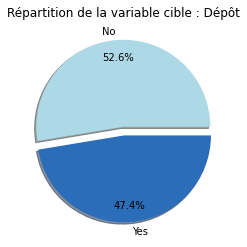

In [18]:
#Répartition de la variable cible : déposit
plt.title('Répartition de la variable cible : Dépôt')
plt.pie (x = df['deposit'].value_counts(),
        labels = ['No', 'Yes'],
         explode = [0.05,0.05],
         colors = ['#add8e6','#2c6dba'],
         labeldistance = 1.1,
         autopct = lambda x: str(np.round(x, 1)) + '%',
         pctdistance =0.8,
         shadow = True);

La répartition des deux modalités de la variables cible est relativement équilibrée.

#### On distingue 4 axes d'analyse pour améliorer la compréhension du comportement des clients lors de la campagne : 
* Socio-démograpique
* Situation bancaire des clients
* Saisonnalité de la campagne
* Campagne en elle-même

##### Visualisation - Socio-démographique

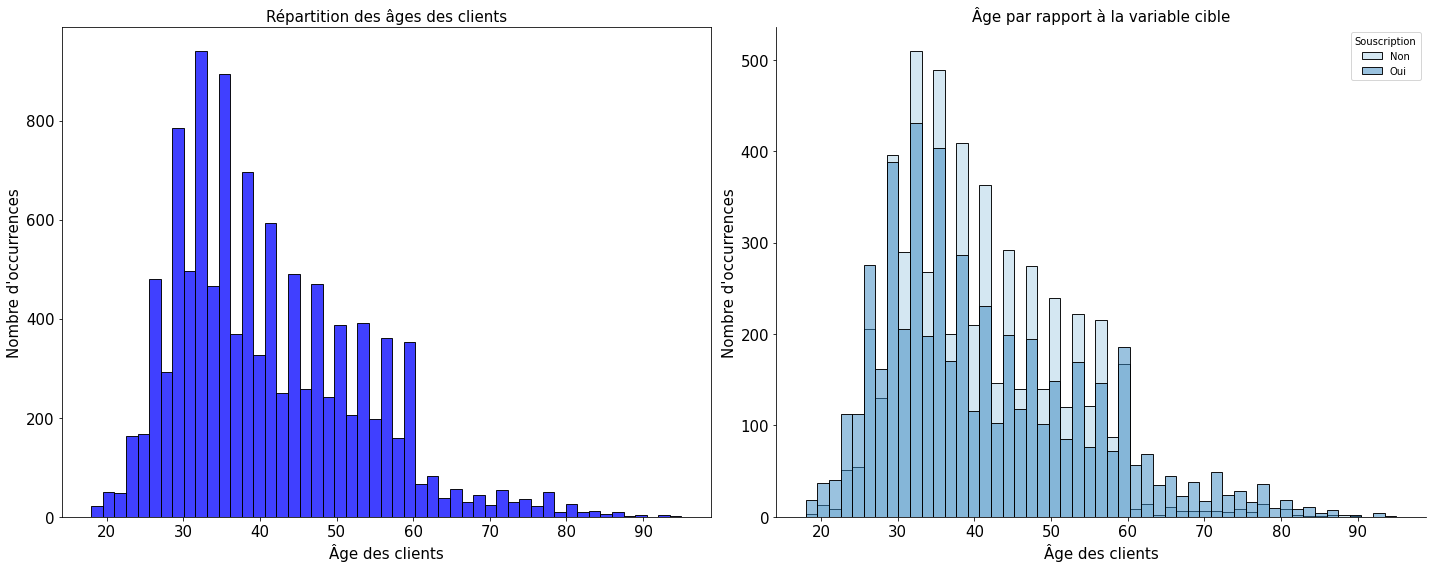

In [19]:
#Visualisation variable âge

# Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.set_size_inches(20, 8)


# Graphique 1 : Répartition des âges des clients
sns.histplot(x='age', data=df, ax=ax1, color = 'blue')
ax1.set_xlabel('Âge des clients', fontsize=15)
ax1.set_ylabel('Nombre d\'occurrences', fontsize=15)
ax1.set_title('Répartition des âges des clients', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticks([20, 30, 40, 50, 60, 70, 80, 90])

# Graphique 2 : Âge par rapport à la variable cible 'deposit'
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.histplot(x='age', data=df, hue='deposit', ax=ax2)
sns.despine(ax=ax2)

ax2.set_xlabel('Âge des clients', fontsize=15)
ax2.set_ylabel('Nombre d\'occurrences', fontsize=15)
ax2.set_title('Âge par rapport à la variable cible', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.legend(title='Souscription', labels=["Non", "Oui"])
 
plt.show()

In [20]:
#ANOVA age ~ deposit
import statsmodels.api

result = statsmodels.formula.api.ols('age ~ deposit', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
deposit,1.0,1.929507e+03,1929.506546,13.610293,0.000226
Residual,11160.0,1.582133e+06,141.768188,NaN,NaN


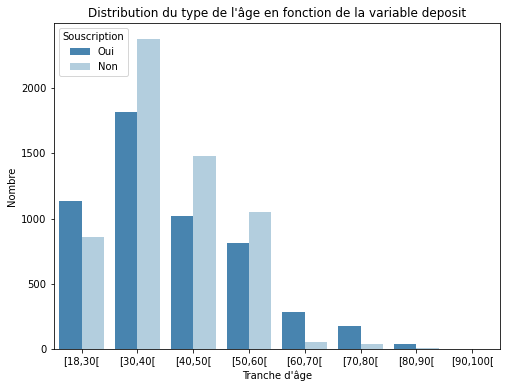

In [21]:
#Création de tranches d'age par 10 ans
df['age_tranche'] = pd.cut(x= df['age'], bins = [18,30,40,50, 60,70, 80, 90,100],
                         labels = ['[18,30[', '[30,40[', '[40,50[', '[50,60[', '[60,70[', '[70,80[', '[80,90[', '[90,100['])

pd.crosstab(df['deposit'],df['age_tranche'])

#Graphique relation entre type de balance et deposit
plt.figure(figsize=(8,6))
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(x='age_tranche', hue='deposit', data = df)
plt.title('Distribution du type de l\'âge en fonction de la variable deposit')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre')
plt.legend(title='Souscription', labels=["Oui", 'Non']);

In [22]:
#Test Chi2 type de balance et deposit
table=pd.crosstab(df.age_tranche,df.deposit)
test = chi2_contingency(table)
statistique = test[0]
p_value = test[1]
degre_liberte = test[2]
print(statistique,p_value,degre_liberte)

453.8484738125562 6.621736033268568e-94 7


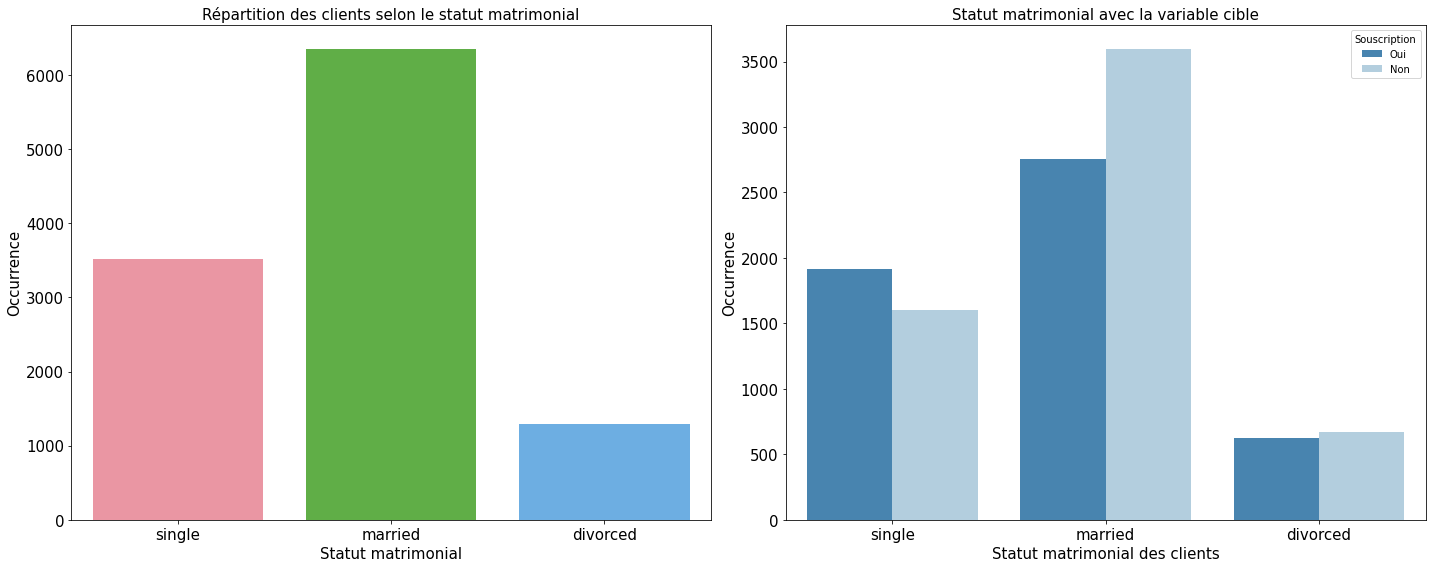

In [23]:
#Visualisation variable marital

#Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.set_size_inches(20, 8)
order_marital = ['single', 'married', 'divorced']

# Graphique 1 : Répartition des clients selon le statut matrimonial
sns.countplot(x='marital', data=df, ax=ax1, order = order_marital)
ax1.set_xlabel('Statut matrimonial', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Répartition des clients selon le statut matrimonial', fontsize=15)
ax1.tick_params(labelsize=15)
 
# Graphique 2 : Statut matrimonial avec la variable cible 'Target'

#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
#Graph
sns.countplot(x='marital', data=df, hue='deposit', ax=ax2, order = order_marital)
ax2.set_xlabel('Statut matrimonial des clients', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Statut matrimonial avec la variable cible', fontsize=15)
ax2.tick_params(labelsize=15)
 
# Afficher les graphiques
plt.tight_layout()
plt.legend(title='Souscription', labels=["Oui", 'Non'])
plt.show()

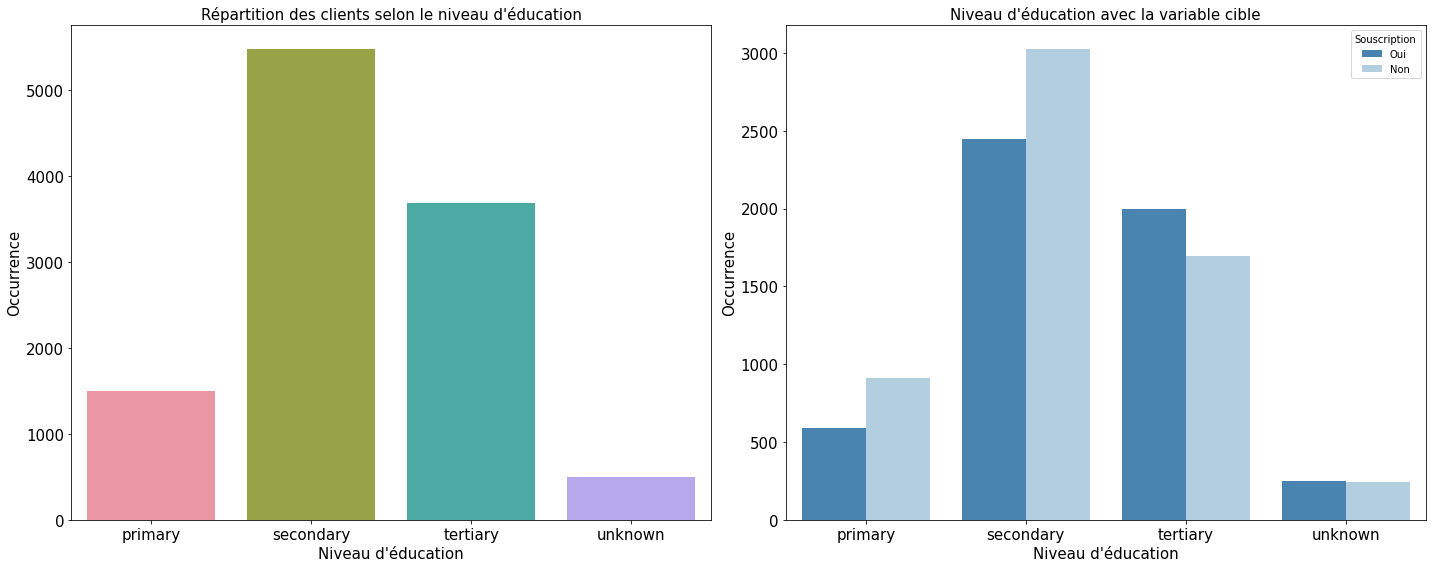

In [24]:
#Visualisation variable education

#Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.set_size_inches(20, 8)
order_education = ['primary', 'secondary', 'tertiary', 'unknown' ]

# Graphique 1 : Répartition des clients selon le niveau d'écuation
sns.countplot(x='education', data=df, ax=ax1, order = order_education)
ax1.set_xlabel('Niveau d\'éducation', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Répartition des clients selon le niveau d\'éducation', fontsize=15)
ax1.tick_params(labelsize=15)
 
# Graphique 2 : Niveau d'écuation avec la variable cible 'Target'
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
#Graph
sns.countplot(x='education', data=df, hue='deposit', ax=ax2, order = order_education)
ax2.set_xlabel('Niveau d\'éducation', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Niveau d\'éducation avec la variable cible', fontsize=15)
ax2.tick_params(labelsize=15)
 
# Afficher les graphiques
plt.legend(title='Souscription', labels=["Oui", 'Non'])
plt.tight_layout()
plt.show()

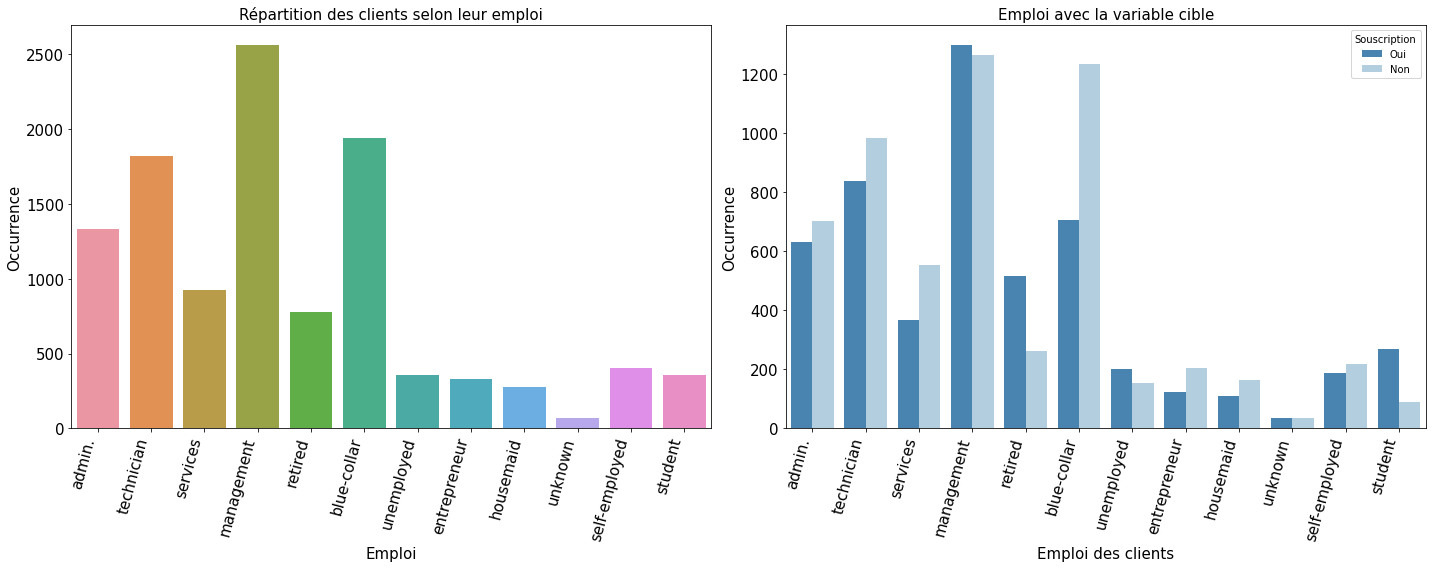

In [25]:
#Visualisation variable job

#Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.set_size_inches(20, 8)

# Graphique 1 : Répartition des clients selon leur emploi
sns.countplot(x='job', data=df, ax=ax1)
ax1.set_xlabel('Emploi', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Répartition des clients selon leur emploi', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75, ha='right')

# Graphique 2 : Job avec la variable cible 'Target'
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
#Graph
sns.countplot(x='job', data=df, hue='deposit', ax=ax2)
ax2.set_xlabel('Emploi des clients', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Emploi avec la variable cible', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=75, ha='right')
 
# Afficher les graphiques
plt.tight_layout()
plt.legend(title='Souscription', labels=["Oui", 'Non']);
plt.show()

##### Visualisation - Situation bancaire

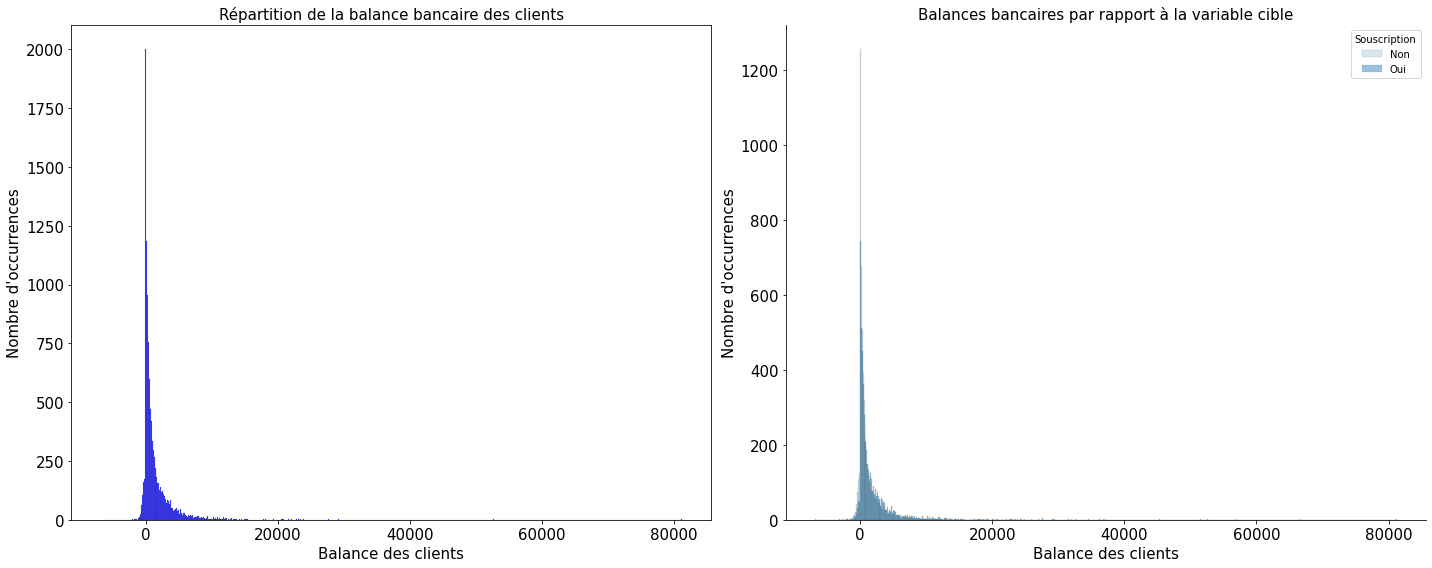

In [26]:
#Visualisation variable balance

# Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.set_size_inches(20, 8)

# Graphique 1 : Répartition des balance des clients
sns.histplot(x='balance', data=df, ax=ax1, color = 'blue')
ax1.set_xlabel('Balance des clients', fontsize=15)
ax1.set_ylabel('Nombre d\'occurrences', fontsize=15)
ax1.set_title('Répartition de la balance bancaire des clients', fontsize=15)
ax1.tick_params(labelsize=15)

# Graphique 2 : Balance par rapport à la variable cible 'deposit'
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
#Graph
sns.histplot(x='balance', data=df, hue='deposit', ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Balance des clients', fontsize=15)
ax2.set_ylabel('Nombre d\'occurrences', fontsize=15)
ax2.set_title('Balances bancaires par rapport à la variable cible', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.legend(title='Souscription', labels=["Non", 'Oui'])
 
plt.show()

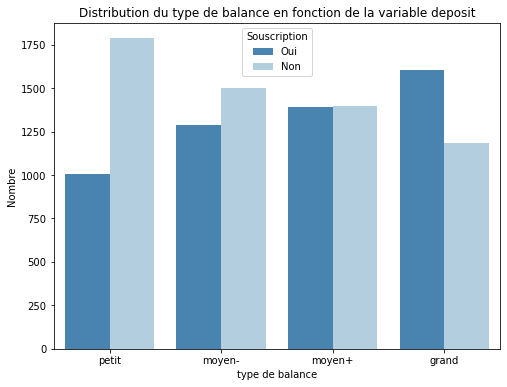

In [27]:
#Création de catégories de comptes : petit, moyen-, moyen+, grand
#Bornes des catégories de comptes
min_balance = df['balance'].min()
max_balance = df['balance'].max()
q1, q2, q3 = df['balance'].quantile([0.25, 0.5, 0.75])

#Nouvelle colonne en fonction de la catégorie de comptes
df['type_balance'] = pd.cut(x= df['balance'], bins = [min_balance, q1, q2, q3, max_balance], labels = ['petit', 'moyen-', 'moyen+', 'grand'])

#Graphique relation entre type de balance et deposit
plt.figure(figsize=(8,6))
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(x='type_balance', hue='deposit', data = df)
plt.title('Distribution du type de balance en fonction de la variable deposit')
plt.xlabel('type de balance')
plt.ylabel('Nombre')
plt.legend(title='Souscription', labels=["Oui", 'Non']);

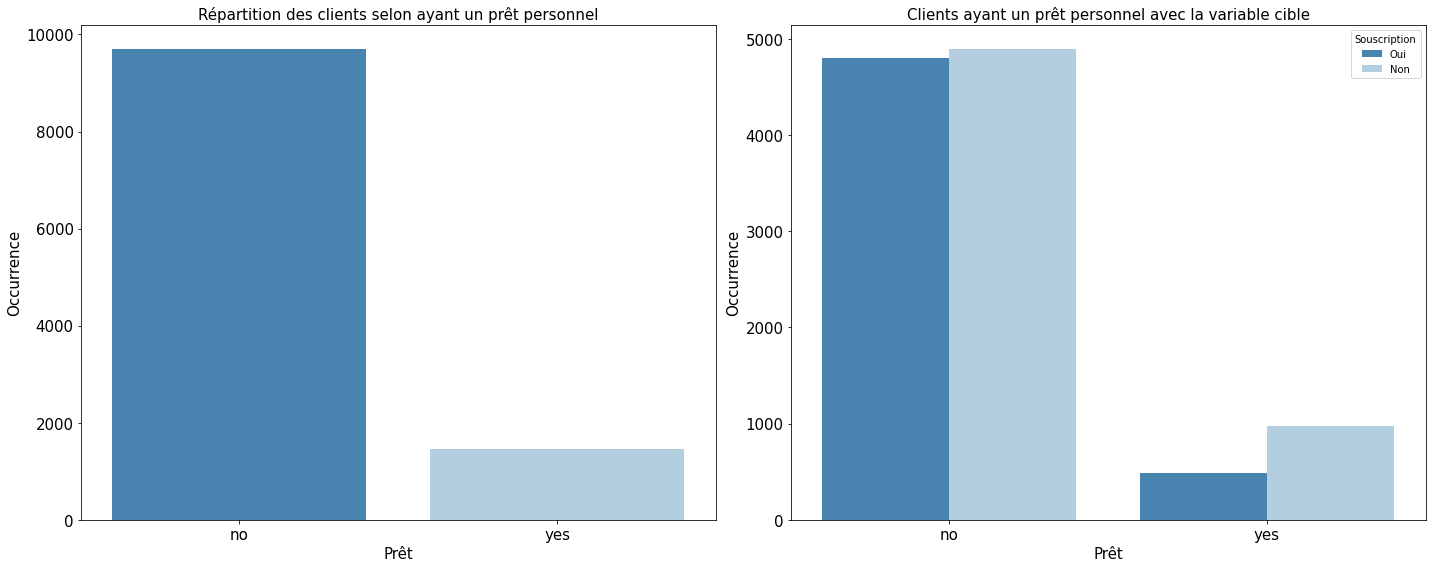

In [28]:
#Visualisation variable loan

#Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.set_size_inches(20, 8)

# Graphique 1 : Répartition des clients selon s'ils ont un prêt personnel
sns.countplot(x='loan', data=df, ax=ax1)
ax1.set_xlabel('Prêt', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Répartition des clients selon ayant un prêt personnel', fontsize=15)
ax1.tick_params(labelsize=15)


# Graphique 2 : Prêt personnel avec la variable cible 'Target'
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(x='loan', data=df, hue='deposit', ax=ax2)
ax2.set_xlabel('Prêt', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Clients ayant un prêt personnel avec la variable cible', fontsize=15)
ax2.tick_params(labelsize=15)
 
# Afficher les graphiques
plt.tight_layout()
plt.legend(title='Souscription', labels=["Oui", 'Non']);
plt.show()

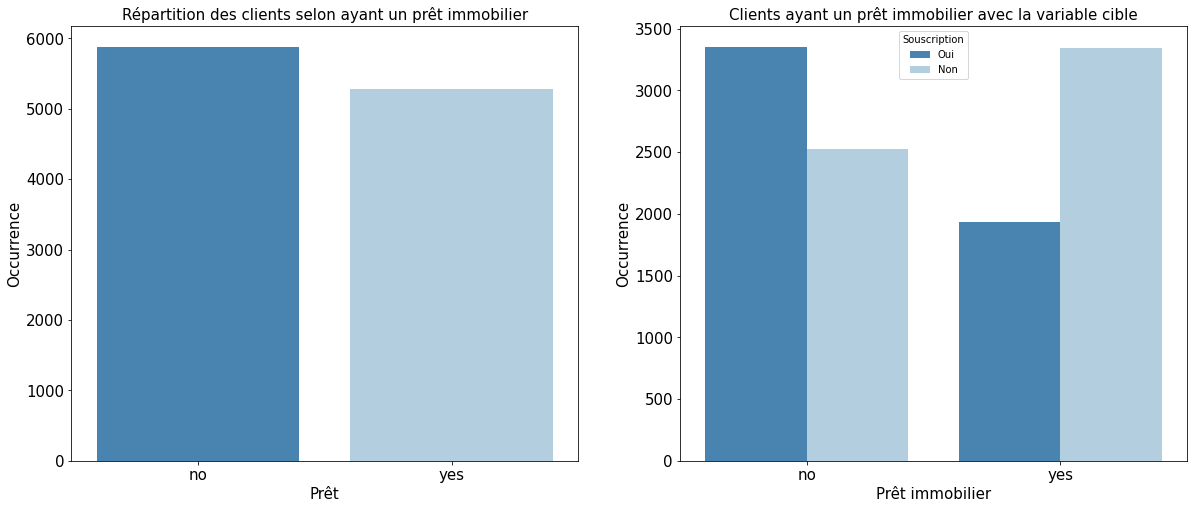

In [29]:
#Visualisation variable housing

#Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.set_size_inches(20, 8)
order_housing = ['no', 'yes']

# Graphique 1 : Répartition des clients selon s'ils ont un prêt immobilier
sns.countplot(x='housing', data=df, ax=ax1, order = order_housing)
ax1.set_xlabel('Prêt', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Répartition des clients selon ayant un prêt immobilier', fontsize=15)
ax1.tick_params(labelsize=15)


# Graphique 2 : Prêt immobilier avec la variable cible 'Target'
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(x='housing', data=df, hue='deposit', ax=ax2, order = order_housing)
ax2.set_xlabel('Prêt immobilier', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Clients ayant un prêt immobilier avec la variable cible', fontsize=15)
ax2.tick_params(labelsize=15)
 
# Afficher les graphiques
plt.legend(title='Souscription', labels=["Oui", 'Non']);
plt.show()

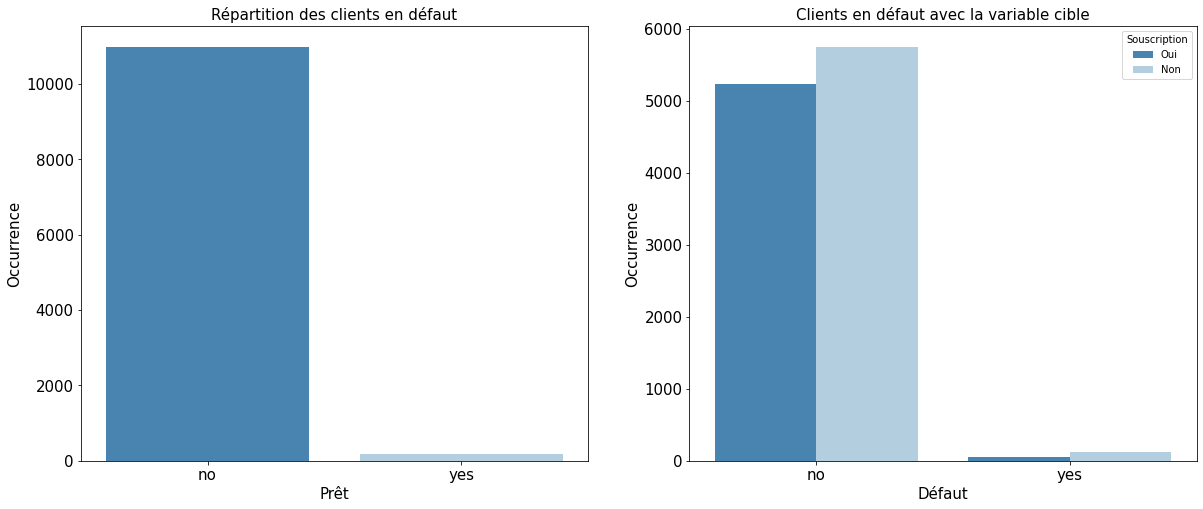

In [30]:
#Visualisation variable default

#Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.set_size_inches(20, 8)
order_default = ['no', 'yes']

# Graphique 1 : Répartition des clients en défaut
sns.countplot(x='default', data=df, ax=ax1, order = order_default)
ax1.set_xlabel('Prêt', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Répartition des clients en défaut', fontsize=15)
ax1.tick_params(labelsize=15)


# Graphique 2 : Défaut avec la variable cible 'Target'
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(x='default', data=df, hue='deposit', ax=ax2, order = order_default)
ax2.set_xlabel('Défaut', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Clients en défaut avec la variable cible', fontsize=15)
ax2.tick_params(labelsize=15)
 
# Afficher les graphiques
plt.legend(title='Souscription', labels=["Oui", 'Non']);
plt.show()

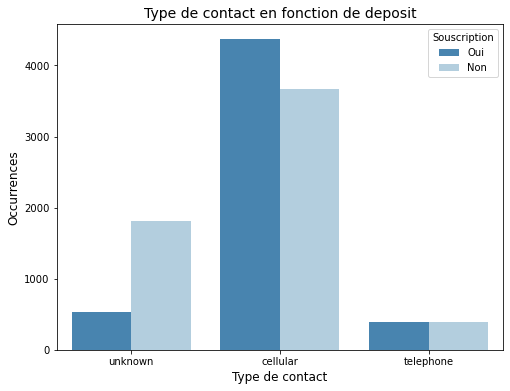

In [37]:
#Visualisation variable contact

# Création du graphique
plt.figure(figsize=(8, 6))
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(data=df, x='contact', hue='deposit')

# Configuration des axes et du titre
plt.xlabel('Type de contact', fontsize=12)
plt.ylabel('Occurrences', fontsize=12)
plt.title('Type de contact en fonction de deposit', fontsize=14)

# Afficher la légende
plt.legend(title='Souscription', labels=['Oui', 'Non'], loc='upper right');
plt.show()

# Afficher le graphique
plt.show()

##### Visualisation - Saisonnalité

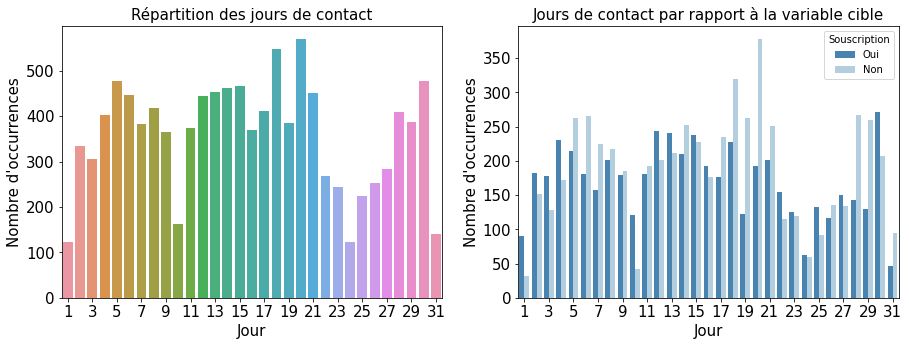

In [31]:
#Visualisation variable jours

# Créez une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Graphique 1 : Répartition des jours de contact
sns.countplot(x='day', data=df, ax=ax1)
ax1.set_title('Répartition des jours de contact', fontsize=15)
ax1.set_xlabel('Jour', fontsize=15)
ax1.set_ylabel('Nombre d\'occurrences', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticks([0, 2 , 4, 6, 8, 10,12,14, 16, 18, 20, 22, 24, 26, 28, 30])
 
# Graphique 2 : Jours de contact par rapport à la variable dépôt
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(x='day', data=df, hue='deposit', ax=ax2)
ax2.set_title('Jours de contact par rapport à la variable cible', fontsize=15)
ax2.set_xlabel('Jour', fontsize=15)
ax2.set_ylabel('Nombre d\'occurrences', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.legend(title='Dépôt', labels=["Non souscrit", 'Souscrit'])
ax2.set_xticks([0, 2 , 4, 6, 8, 10,12,14, 16, 18, 20, 22, 24, 26, 28, 30])
 
plt.legend(title= 'Souscription',labels=['Oui', 'Non'])
plt.show()

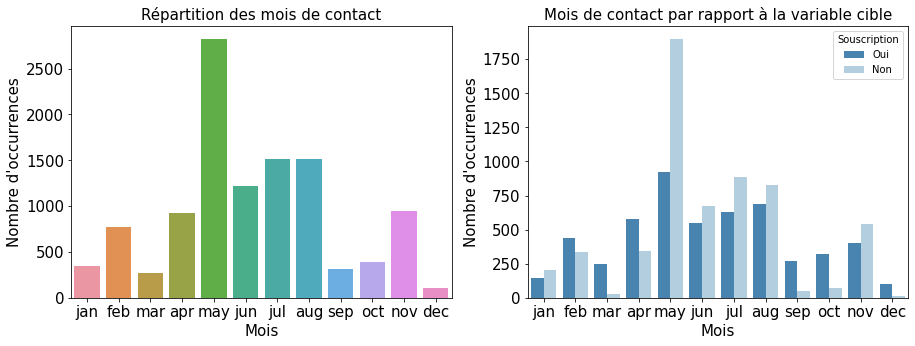

In [32]:
#Visualisation variable mois

# Créez une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
order_month = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
 
# Graphique 1 : Répartition des mois de contact
sns.countplot(x='month', data=df, ax=ax1, order =order_month  )
ax1.set_title('Répartition des mois de contact', fontsize=15)
ax1.set_xlabel('Mois', fontsize=15)
ax1.set_ylabel('Nombre d\'occurrences', fontsize=15)
ax1.tick_params(labelsize=15)
 
# Graphique 2 : Mois de contact par rapport à la variable cible 'deposit'
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(x='month', data=df, hue='deposit', ax=ax2, order =order_month)
ax2.set_title('Mois de contact par rapport à la variable cible', fontsize=15)
ax2.set_xlabel('Mois', fontsize=15)
ax2.set_ylabel('Nombre d\'occurrences', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.legend(title='Dépôt', labels=["Non souscrit", 'Souscrit'])
 
plt.legend(title='Souscription', labels=['Oui', 'Non']);
plt.show()

##### Visualisation - Campagne marketing

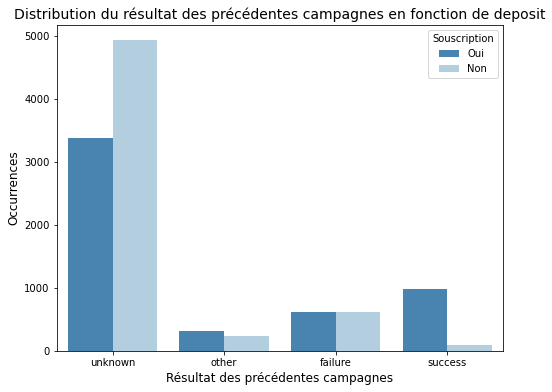

In [34]:
#Visualisation variable poutcome

# Création du graphique
plt.figure(figsize=(8, 6))
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(data=df, x='poutcome', hue='deposit')

# Configuration des axes et du titre
plt.xlabel('Résultat des précédentes campagnes', fontsize=12)
plt.ylabel('Occurrences', fontsize=12)
plt.title('Distribution du résultat des précédentes campagnes en fonction de deposit', fontsize=14)

# Afficher la légende
plt.legend(title='Souscription', labels=['Oui', 'Non'], loc='upper right');
plt.show()

# Afficher le graphique
plt.show()

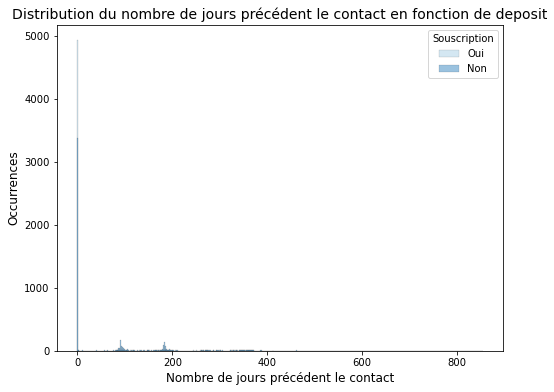

In [35]:
#Visualisation variable pdays

# Création du graphique
plt.figure(figsize=(8, 6))
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.histplot(data=df, x='pdays', hue='deposit')

# Configuration des axes et du titre
plt.xlabel('Nombre de jours précédent le contact', fontsize=12)
plt.ylabel('Occurrences', fontsize=12)
plt.title('Distribution du nombre de jours précédent le contact en fonction de deposit', fontsize=14)

# Afficher la légende
plt.legend(title='Souscription', labels=['Oui', 'Non'], loc='upper right');
plt.show()

# Afficher le graphique
plt.show()

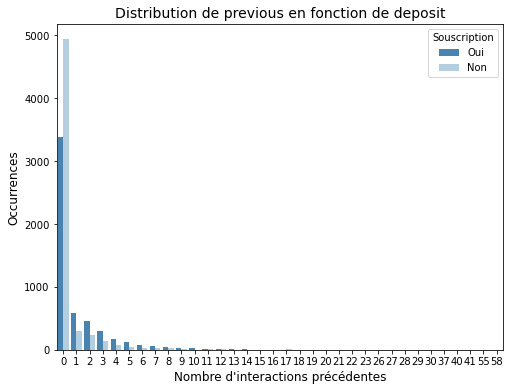

In [33]:
#Visualisation variable previous

# Création du graphique
plt.figure(figsize=(8, 6))
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(data=df, x='previous', hue='deposit')

# Configuration des axes et du titre
plt.xlabel('Nombre d\'interactions précédentes', fontsize=12)
plt.ylabel('Occurrences', fontsize=12)
plt.title('Distribution de previous en fonction de deposit', fontsize=14)

# Afficher la légende
plt.legend(title='Souscription', labels=['Oui', 'Non'], loc='upper right');
plt.show()

# Afficher le graphique
plt.show()



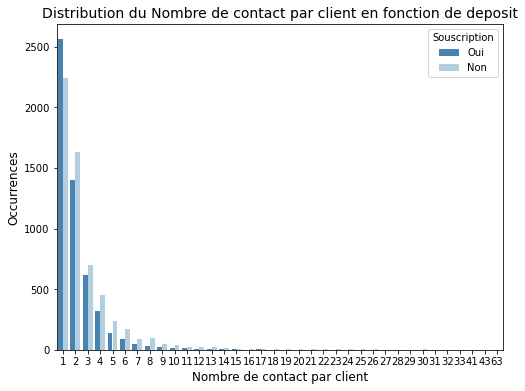

In [36]:
#Visualisation variable campaign

# Création du graphique
plt.figure(figsize=(8, 6))
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.countplot(data=df, x='campaign', hue='deposit')

# Configuration des axes et du titre
plt.xlabel('Nombre de contact par client', fontsize=12)
plt.ylabel('Occurrences', fontsize=12)
plt.title('Distribution du Nombre de contact par client en fonction de deposit', fontsize=14)

# Afficher la légende
plt.legend(title='Souscription', labels=['Oui', 'Non'], loc='upper right');
plt.show()

# Afficher le graphique
plt.show()

#### Ces visualisations et test statistiques nous permettent déjà d'identifier un profil qui répondrait positivement au produit. Les critères que nous avons relevés sont  : 

* Age : - 30 ans ou + 60 ans
* Catégorie professionnelle : retraité, étudiant, manager
* Niveau d’éducation : études supérieures
* Statut marital : Célibataire
* Situation bancaire : Solde > 1708€, sans prêt immobilier
* Saisonnalité : Le premier et le dernier quadrimestre de l’année 


### Nettoyage des données

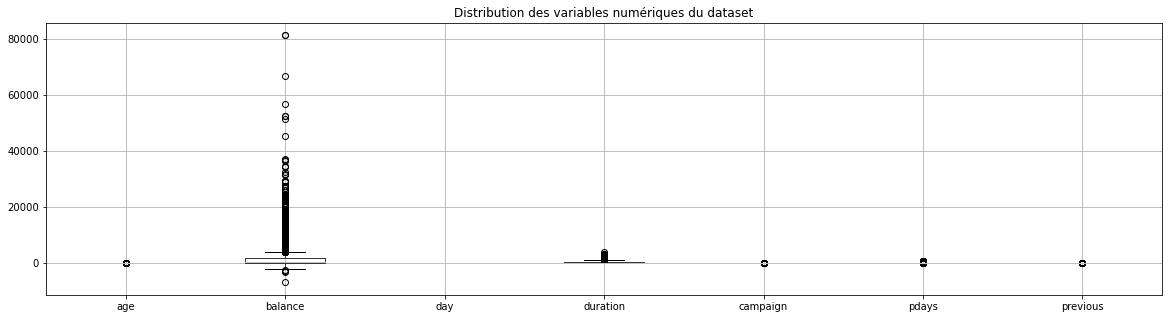

In [39]:
#Mise en avant des outlayers du dataset
df.boxplot(return_type='axes', figsize=(20,5))
plt.title('Distribution des variables numériques du dataset');

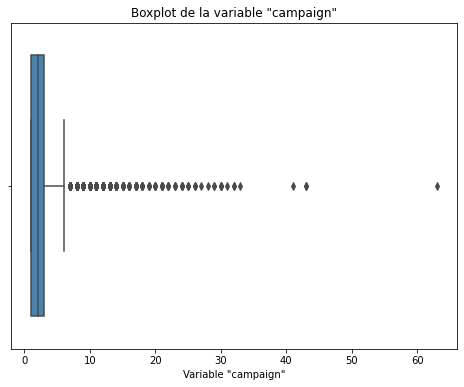

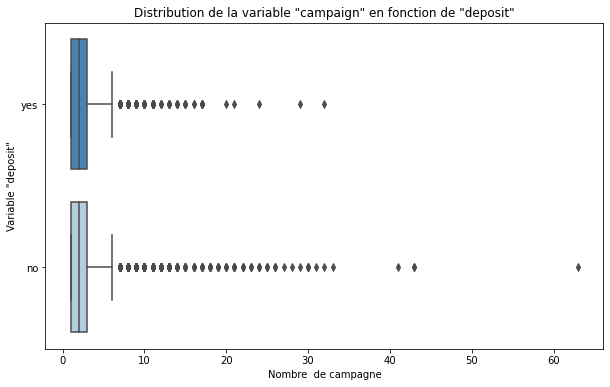

In [40]:
#Traitement variable Campaign

#boxplot variable campaign
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='campaign')
plt.title('Boxplot de la variable "campaign"')
plt.xlabel('Variable "campaign"')
plt.show()
 
#boxplot campaign en fonction de la variable deposit
plt.figure(figsize=(10, 6))
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.boxplot(data=df, x='campaign', y='deposit')
plt.title('Distribution de la variable "campaign" en fonction de "deposit"')
plt.xlabel('Nombre  de campagne')
plt.ylabel('Variable "deposit"')
plt.show()

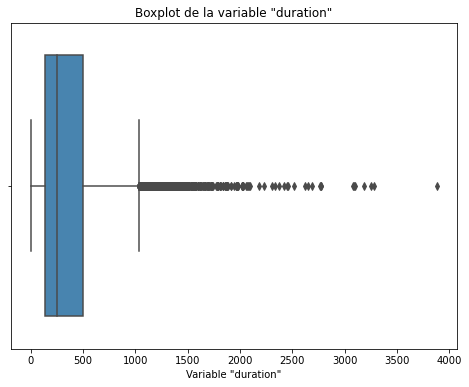

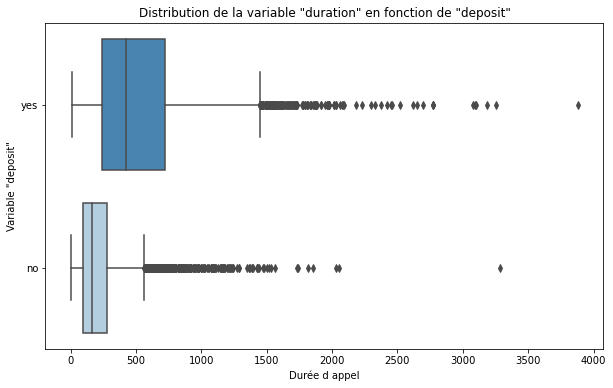

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


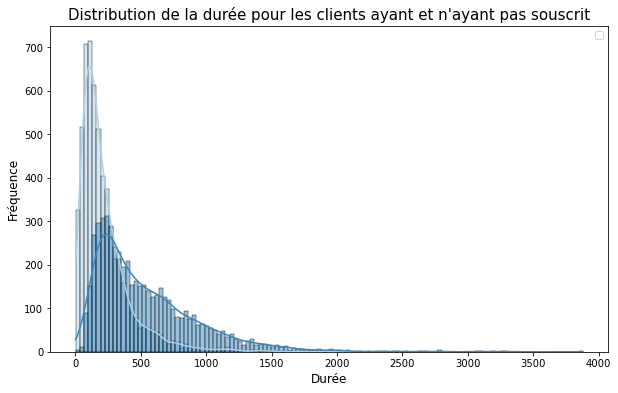

In [41]:
#Traitement variable Duration

#boxplot variable duration
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='duration')
plt.title('Boxplot de la variable "duration"')
plt.xlabel('Variable "duration"')
plt.show()
 
#boxplot duration en function de deposit
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='duration', y='deposit')
plt.title('Distribution de la variable "duration" en fonction de "deposit"')
plt.xlabel('Durée d appel')
plt.ylabel('Variable "deposit"')
plt.show()
 
# Créer une figure pour afficher la distribution de la durée
fig, ax = plt.subplots(figsize=(10, 6))
# Distribution de la durée pour les clients ayant souscrit (yes)
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.histplot(data=df, x='duration', hue='deposit', kde=True)
ax.set_title("Distribution de la durée pour les clients ayant et n'ayant pas souscrit", fontsize=15)
ax.set_xlabel("Durée", fontsize=12)
ax.set_ylabel("Fréquence", fontsize=12)
# Afficher la légende
ax.legend(title="Deposit", loc='upper right')
# Afficher le graphique
plt.legend()
plt.show()


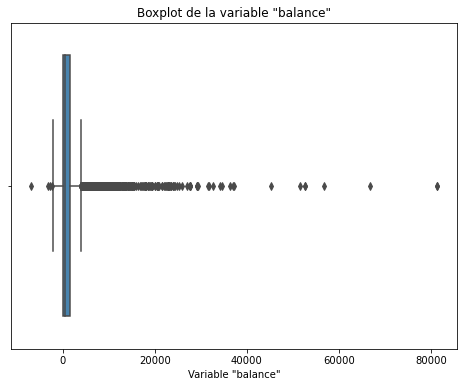

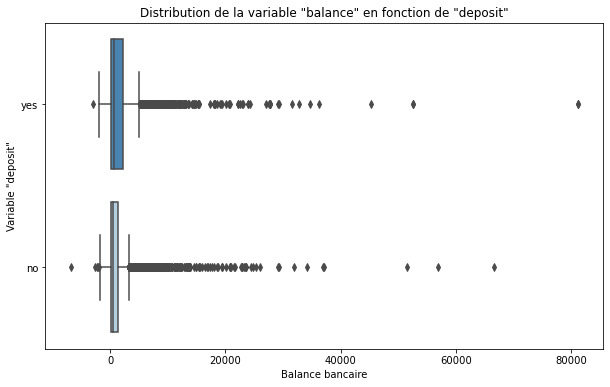

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


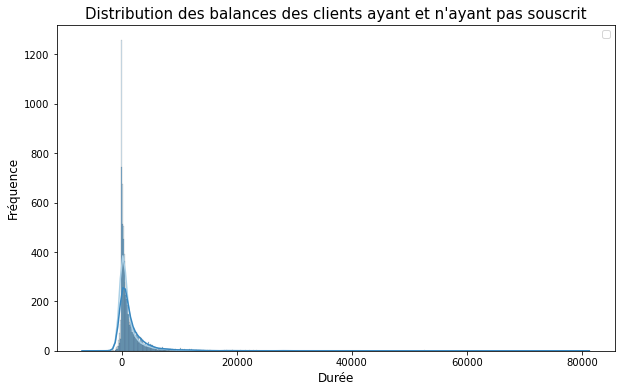

In [42]:
#Traitement variable Balance

#boxplot variable duration
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='balance')
plt.title('Boxplot de la variable "balance"')
plt.xlabel('Variable "balance"')
plt.show()
 
#boxplot duration en function de deposit
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='balance', y='deposit')
plt.title('Distribution de la variable "balance" en fonction de "deposit"')
plt.xlabel('Balance bancaire')
plt.ylabel('Variable "deposit"')
plt.show()
 
# Créer une figure pour afficher la distribution de la durée
fig, ax = plt.subplots(figsize=(10, 6))
# Distribution de la durée pour les clients ayant souscrit (yes)
#Définition de la palette de couleur
palette = sns.color_palette('Blues', n_colors=2)
# Inverser l'ordre des couleurs
palette.reverse()
# Utiliser la nouvelle palette inversée
sns.set_palette(palette)
sns.histplot(data=df, x='balance', hue='deposit', kde=True)
ax.set_title("Distribution des balances des clients ayant et n'ayant pas souscrit", fontsize=15)
ax.set_xlabel("Durée", fontsize=12)
ax.set_ylabel("Fréquence", fontsize=12)
# Afficher la légende
ax.legend(title="Deposit", loc='upper right')
# Afficher le graphique
plt.legend()

#### Nous remarquons certaines valeurs extrêmes :
* Pour la variable balance, elles sont plausibles et sont conservées.
* Pour les variables campagin et previous certaines valeurs sont jugées abérrantes et seront remplacées via la méthode des écarts interquartiles. 

### Traitement et pre-processing

In [43]:
# Remplacement les unknowns dans poutcome par other
df['poutcome'] = df.poutcome.replace({"unknown":"other"})

In [44]:
# Retire la variable pdays qui est fortement corrélée avec previous
df = df.drop('pdays', axis = 1)

In [45]:
# Encodage de la variable deposit.On remplace 'yes' et 'no' dans deposit respectivement par 1 et 0
df.deposit = df.deposit.replace({"yes":1,"no":0})

In [46]:
#Conversion des variables catégorielles en variables indicatrices grâce à get_dummies
df = pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','poutcome','month','contact'])

In [47]:
# Retire les variables doublons age_tranche et type_balance
df = df.drop(['age_tranche','type_balance'], axis = 1)

In [48]:
# Remplacement des valeurs abbérantes de campaign
import numpy as np
q1_campaign = round(np.percentile(df.campaign, 25))
q3_campaign = round(np.percentile(df.campaign, 75))
interQ = q3_campaign - q1_campaign

ab_campaign_high = q3_campaign + 1.5*interQ
ab_campaign_low = q1_campaign - 1.5*interQ
df.campaign[df.campaign > ab_campaign_high]  = np.nan
# On remplace toutes les valeurs de previous en dehors de l'intervalle [ab_campaign_low,ab_campaign_high] par np.nan

df.loc[(df['campaign'] < ab_campaign_low) | (df['campaign']>ab_campaign_high), 'campaign'] = np.nan

df['campaign'] = df['campaign'].fillna(df['campaign'].mean())


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [49]:
#Remplacement des valeurs abbérantes de previous
q1_previous = round(np.percentile(df.previous, 25))
q3_previous = round(np.percentile(df.previous, 75))
interQ = q3_previous - q1_previous
ab_previous_high = q3_previous + 1.5*interQ
ab_previous_low = q1_previous - 1.5*interQ
# On remplace toutes les valeurs de previous en dehors de l'intervalle [ab_previous_low,ab_previous_high] par np.nan

df.loc[(df['previous'] < ab_previous_low) | (df['previous']>ab_campaign_high), 'previous'] = np.nan


df['previous'] = df['previous'].fillna(df['previous'].mean())

In [50]:
# Séparation de la valeur cible et des valeurs explicatives
y = df['deposit']
X = df.drop('deposit',axis = 1)

# Séparation du jeu de données en train et test dont 20% pour le test
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [51]:
#Standardisation des variables numériques
num=['age', 'balance', 'day', 'duration', 'campaign','previous']
sc = StandardScaler()
X_train.loc[:,num] = sc.fit_transform(X_train[num])
X_test.loc[:,num] = sc.transform(X_test[num])

### Modélisation

#### Premières modélisations

In [52]:
#Instanciation et entrainement Régression Logistique
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
print("La matrice de confusion de la logistique regresssion est:\n", confusion_matrix(y_test,y_pred_LR))

La matrice de confusion de la logistique regresssion est:
 [[978 188]
 [234 833]]


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [53]:
#Chronomètre de la RF sans opti
start_time = time.time()

# Instanciation et entrainement Random Forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_pred_RF= RF.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

1.4349596500396729


In [54]:
#Instanciation et entrainement SVC
svc = svm.SVC()
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_test)
print("La matrice de confusion du support vector machine est:\n", confusion_matrix(y_test,y_pred_svc))

La matrice de confusion du support vector machine est:
 [[954 212]
 [147 920]]


In [55]:
# Instanciation et entrainement Neural network
NN = KNeighborsClassifier()
NN.fit(X_train, y_train)
y_pred_NN= NN.predict(X_test)
print("La matrice de confusion du réseau des neuronnes est:\n", confusion_matrix(y_test,y_pred_NN))

La matrice de confusion du réseau des neuronnes est:
 [[984 182]
 [263 804]]


In [56]:
#Instanciation et entrainement Arbre de décision
CLF = DecisionTreeClassifier()
CLF.fit(X_train, y_train)
y_pred_CLF= CLF.predict(X_test)
print("La matrice de confusion de l\'arbre de décision est:\n", confusion_matrix(y_test,y_pred_CLF))

La matrice de confusion de l'arbre de décision est:
 [[931 235]
 [264 803]]


In [57]:
#Instanciation et entrainement Ada Boost
ada= AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada= ada.predict(X_test)
print("La matrice de confusion de adaboost est:\n", confusion_matrix(y_test,y_pred_ada))

La matrice de confusion de adaboost est:
 [[985 181]
 [230 837]]


In [58]:
#Chronomètre du GXBoost sans opti
start_time = time.time()

xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb= xgb.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

print("La matrice de confusion de GXBoost est:\n", confusion_matrix(y_test,y_pred_xgb))

1.298680067062378
La matrice de confusion de GXBoost est:
 [[958 208]
 [144 923]]


In [59]:
#Accuracy Score des modèles entrainés (jeu entrainement)
print("Le score sur le train de la logistique regression est: ",LR.score(X_train,y_train))
print("Le score sur le train du support vector machine est: ",svc.score(X_train,y_train))
print("Le score sur le train du random forest est: ",RF.score(X_train,y_train))
print("Le score sur le train du réseau des neuronnes est: ",NN.score(X_train,y_train))
print("Le score sur le train de l'\arbre de décision est: ",CLF.score(X_train,y_train))
print("Le score sur le train de adaboost est: ",ada.score(X_train,y_train))
print("Le score sur le train de XGBoost est: ",xgb.score(X_train,y_train))

Le score sur le train de la logistique regression est:  0.8286482248852055
Le score sur le train du support vector machine est:  0.8796057789226117
Le score sur le train du random forest est:  1.0
Le score sur le train du réseau des neuronnes est:  0.8605666927987456
Le score sur le train de l'rbre de décision est:  1.0
Le score sur le train de adaboost est:  0.8294321872550118
Le score sur le train de XGBoost est:  0.9585619890245268


In [60]:
#Accuracy Score des modèles entrainés (jeu test)
print("Le score de la logistique regression est: ",accuracy_score(y_test,y_pred_LR))
print("Le score du support vector machine est: ",accuracy_score(y_test,y_pred_svc))
print("Le score du random forest est: ",accuracy_score(y_test,y_pred_RF))
print("Le score du réseau des neuronnes est: ",accuracy_score(y_test,y_pred_NN))
print("Le score de l'\arbre de décision est: ",accuracy_score(y_test,y_pred_CLF))
print("Le score de adaboost est: ",accuracy_score(y_test,y_pred_ada))
print("Le score de XGBoost est: ",accuracy_score(y_test,y_pred_xgb))

Le score de la logistique regression est:  0.8110165696372593
Le score du support vector machine est:  0.8392297357814599
Le score du random forest est:  0.8334079713390058
Le score du réseau des neuronnes est:  0.8007165248544559
Le score de l'rbre de décision est:  0.7765338110165696
Le score de adaboost est:  0.8159426780116436
Le score de XGBoost est:  0.8423645320197044


In [61]:
#Résumés des scores de tous les modèles sur jeu test
print("Les scores de la logistique regression est: \n",classification_report(y_test,y_pred_LR))
print("Les scores du support vector machine est: \n",classification_report(y_test,y_pred_svc))
print("Les scores du random forest est: \n",classification_report(y_test,y_pred_RF))
print("Les scores du réseau des neuronnes est: \n",classification_report(y_test,y_pred_NN))
print("Les scores de l'\arbre de décision est: \n",classification_report(y_test,y_pred_CLF))
print("Les scores de adaboost est: \n",classification_report(y_test,y_pred_ada))
print("Les scores de XGBoost est: \n",classification_report(y_test,y_pred_xgb))

Les scores de la logistique regression est: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1166
           1       0.82      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

Les scores du support vector machine est: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1166
           1       0.81      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233

Les scores du random forest est: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   

Compte tenu du léger déséquilibre des classes, nous chercherons notamment à optimiser le F1 score. \
Les 3 modèles les plus performants sont le SVM, la Random Forest et le XGBoost.

#### Optimisation des trois modèles les plus performants

In [ ]:
# Application d'une GridSearchCV sur le support vector machine

#param_grid_svc = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001],'kernel':['linear','rbf']}
#hyper_parameters_svc = GridSearchCV(svc, param_grid_svc, cv=2, return_train_score=False)

# fitting the model for grid search
#hyper_parameters_svc.fit(X_train, y_train)
#print(hyper_parameters_svc.best_params_)

In [64]:
# Récupération des meilleurs paramètres SVC
best_svc = svm.SVC(C=1, gamma=0.1, kernel='rbf')

#Entrainement du nouveau modèle SVC avec paramètres optimisés par la GridSearchCV
best_svc.fit(X_train, y_train)

y_pred_svc_new = best_svc.predict(X_test)

In [ ]:
#Application d'une GridSearchCV sur la random forest
#param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000],
                  'min_samples_leaf': [1, 3, 5],
                       'max_features':  ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}]

#hyper_parameters_rf = GridSearchCV(RF, param_grid_rf, refit = True,verbose=3)

# fitting the model for grid search
#hyper_parameters_rf.fit(X_train, y_train)
#print(hyper_parameters_rf.best_params_)

In [62]:
# Récupération des meilleurs paramètres random forest
best_rf=RandomForestClassifier(criterion= 'entropy',max_features= 'log2', min_samples_leaf= 1, n_estimators=1000)

In [63]:
#Entrainement et temps de calcul du nouveau modèle RF avec paramètres optimisés par la GridSearchCV
start_time = time.time()

best_rf.fit(X_train, y_train)

y_pred_rf_new = best_rf.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

13.758341550827026


In [ ]:
# Application d'une GridSearchCV sur le XGBoost

#param_grid_xgb =  {'max_depth': [1,2,3,4,5,6,7],
              'learning_rate': [0.002,0.004,0.006,0.008, 0.1, 0.2,0.3,0.4],
              'n_estimators': [40,45,50, 100],'gamma':[1,0.1,0.001,0.0001]}


#hyper_parameters_xgb = GridSearchCV(xgb, param_grid_xgb, refit = True,verbose=3)
# fitting the model for grid search
#hyper_parameters_xgb.fit(X_train, y_train)
#print(hyper_parameters_xgb.best_params_)


In [65]:
# On récupère les meilleurs paramètres
best_xgb=XGBClassifier(gamma=0.001, learning_rate=0.3, max_depth=4, n_estimators=100)


In [66]:
#Entrainement et temps de calcul du nouveau modèle XGBoost avec paramètres optimisés par la GridSearchCV
start_time = time.time()

best_xgb.fit(X_train, y_train)
y_pred_xgb_new = best_xgb.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

1.0791144371032715


In [67]:
#Nouveaux scores des modèles optimisés par la GridSearchCV
print("Les scores du support vector machine est: \n",classification_report(y_test,y_pred_svc_new))
print("Les scores du random forest est: \n",classification_report(y_test,y_pred_rf_new))
print("Les scores du XGBoost est: \n",classification_report(y_test,y_pred_xgb_new))

Les scores du support vector machine est: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1166
           1       0.82      0.87      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.85      0.84      0.84      2233

Les scores du random forest est: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1166
           1       0.81      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233

Les scores du XGBoost est: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1166
           1       0.82      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0

L'optimisation a permis d'améliorer légèrement les résultats sur le jeu de test. \
Les modèles finaux ont des scores tout à fait comparable. \
Nous sélectionnons pour la suite le XGBoost pour sa rapidité de calcul qui permet de maximiser le couple perfomance/rapidité.

### Explication et compréhension des modèles sélectionnés

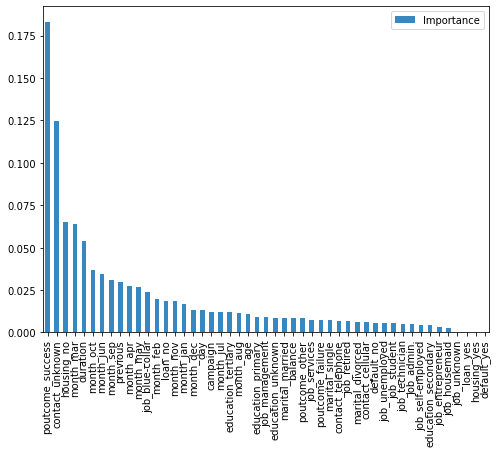

In [70]:
feat_importances_XGboost = pd.DataFrame(best_xgb.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances_XGboost.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_XGboost.plot(kind='bar', figsize=(8,6))
plt.show()

In [71]:
feat_importances_XGboost.align

<bound method DataFrame.align of                      Importance
poutcome_success       0.183106
contact_unknown        0.124726
housing_no             0.065283
month_mar              0.063913
duration               0.054011
month_oct              0.036951
month_jun              0.034477
month_sep              0.030809
previous               0.029779
month_apr              0.027384
month_may              0.026834
job_blue-collar        0.023649
month_feb              0.019478
loan_no                0.018811
month_nov              0.018325
month_jan              0.016580
month_dec              0.013329
day                    0.013304
campaign               0.012295
month_jul              0.012144
education_tertiary     0.011749
month_aug              0.011412
age                    0.010953
education_primary      0.008818
job_management         0.008807
education_unknown      0.008777
marital_married        0.008762
balance                0.008623
poutcome_other         0.008380
job_ser

##### Top 5 best features :

* poutcome_sucess (0.18) : Le résultat de la dernière campagne semble influer significativement sur le résultat des suivantes. Certains clients sont probablement sensibles à ce type de démarchage.


* contact_unknown (0.12) : Les types de contact non renseignés ont plus de chance de répondre à la négative à la souscription. Nous ne pouvons que supposer des raisons mais nous pouvons imaginer qu’il s’agit de clients moins engagés qui n’ont pas voulu renseigner cette information voire que ces clients soient issues d’anciennes bases moins actuelles.


* Housing_no (0.07) : Le fait de ne pas avoir de crédit immobilier augmente les probabilités que le client souscrive au dépôt lors de la campagne.


* month_mar (0.06) :  Le mois de mars est associé à une plus forte proportion de clients qui répondent positivement à la campagne.


* duration (0.05) : Une plus longue durée d’appel traduit logiquement un plus grand intérêt du client et augmente alors les probabilités que le client souscrive.


In [ ]:
# Interprétation avec SHAP XGBoost

best_xgb=XGBClassifier(gamma=0.001, learning_rate=0.3, max_depth=4, n_estimators=100)

best_xg.fit(X_train, y_train)

explainer = shap.Explainer(best_xg)

# Calcul des valeurs SHAP pour toutes les observations du jeu de test

shap_values = explainer.shap_values(X_test)

feature_names = X_test.columns.to_list()

# Créez un graphique de résumé SHAP pour afficher les features importances
shap.summary_plot(shap_values,
                  feature_names=feature_names)

# Créez un graphique d'analyse local du SHAP
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0,:], X_test.iloc[0,:],matplotlib=True)

Alors que les best features prennent en compte le poids des variables de façon isolée, SHapley Additive exPlanations (SHAP) permet de prendre en considération en plus les intéractions entre les variables. Cet outil nous apporte une compréhension plus fine et complète du fonctionnement du modèle.

Les variables qui ont une plus forte influence sur les prédictions du modèle sont :
* La durée de l'appel : plus un appel est long, plus l'appel est prometteur
* Type de contact (inconnu) : si le type de contact est inconnu, les chances de soucription au dépôt sont réduites
* Résultat de la précédente campagne (succès) : si le client a soucrit à la dernière campagne alors il aura plus de chance de répondre positivement à la suivante.
* Prêt Immobilier (non) : Ne pas avoir de crédit immobilier augmente les probabilités qu'un client soucrive au dépôt durant la campagne.


#### Réduction de variables avec SHAP sur le XGBOOST

In [72]:
#Réduction de variables avec 5 best features de SHAP 
X_train_reduced = X_train[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no']].copy()
X_test_reduced = X_test[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no']].copy()

In [73]:
### Chrono du GXBoost reduced 5 best features SHAP
start_time = time.time()

best_xgb.fit(X_train_reduced, y_train)
y_pred_xgb_reduced = best_xgb.predict(X_test_reduced)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

0.4198763370513916


In [74]:
print("Les scores du XGBoost reduit avec les 6 meilleures features SHAP sont: \n",classification_report(y_test,y_pred_xgb_reduced))

Les scores du XGBoost reduit avec les 6 meilleures features SHAP sont: 
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      1166
           1       0.77      0.80      0.79      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



In [75]:
#Réduction de variables avec 6 best features de SHAP 
X_train_reduced = X_train[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no', 'previous']].copy()
X_test_reduced = X_test[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no', 'previous']].copy()

In [76]:
### Chrono du GXBoost reduced 6 best features SHAP
start_time = time.time()

best_xgb.fit(X_train_reduced, y_train)
y_pred_xgb_reduced = best_xgb.predict(X_test_reduced)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

0.3809812068939209


In [77]:
print("Les scores du XGBoost reduit avec les 6 meilleures features SHAP sont: \n",classification_report(y_test,y_pred_xgb_reduced))

Les scores du XGBoost reduit avec les 6 meilleures features SHAP sont: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1166
           1       0.78      0.80      0.79      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



In [78]:
#Réduction de variables avec 7 best features de SHAP 
X_train_reduced = X_train[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no', 'previous', 'balance']].copy()
X_test_reduced = X_test[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no', 'previous', 'balance']].copy()

In [79]:
### Chrono du GXBoost reduced 7 best features SHAP
start_time = time.time()

best_xgb.fit(X_train_reduced, y_train)
y_pred_xgb_reduced = best_xgb.predict(X_test_reduced)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

0.522601842880249


In [80]:
print("Les scores du XGBoost reduit avec les 7 meilleures features SHAP sont: \n",classification_report(y_test,y_pred_xgb_reduced))

Les scores du XGBoost reduit avec les 7 meilleures features SHAP sont: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1166
           1       0.79      0.81      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.80      0.81      0.80      2233
weighted avg       0.81      0.81      0.81      2233



In [81]:
#Réduction de variables avec 8 best features de SHAP 
X_train_reduced = X_train[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no', 'previous', 'balance', 'age']].copy()
X_test_reduced = X_test[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no', 'previous', 'balance', 'age']].copy()

In [82]:
### Chrono du GXBoost reduced 8 best features SHAP
start_time = time.time()

best_xgb.fit(X_train_reduced, y_train)
y_pred_xgb_reduced = best_xgb.predict(X_test_reduced)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

0.5315783023834229


In [83]:
print("Les scores du XGBoost reduit avec les 8 meilleures features SHAP sont: \n",classification_report(y_test,y_pred_xgb_reduced))

Les scores du XGBoost reduit avec les 8 meilleures features SHAP sont: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1166
           1       0.79      0.81      0.80      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



In [84]:
#Réduction de variables avec 9 best features de SHAP 
X_train_reduced = X_train[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no', 'previous', 'balance', 'age', 'month_jan', 'month_feb', 'month_mar','month_apr','month_may','month_jun' ,'month_jul','month_aug','month_sep', 'month_oct','month_nov', 'month_dec']].copy()
X_test_reduced = X_test[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no', 'previous', 'balance', 'age','month_jan', 'month_feb', 'month_mar','month_apr','month_may','month_jun' ,'month_jul','month_aug','month_sep', 'month_oct','month_nov', 'month_dec']].copy()

In [85]:
### Chrono du GXBoost reduced 9 best features SHAP
start_time = time.time()

best_xgb.fit(X_train_reduced, y_train)
y_pred_xgb_reduced = best_xgb.predict(X_test_reduced)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

0.7868950366973877


In [86]:
print("Les scores du XGBoost reduit avec les 9 meilleures features SHAP sont: \n",classification_report(y_test,y_pred_xgb_reduced))

Les scores du XGBoost reduit avec les 9 meilleures features SHAP sont: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1166
           1       0.82      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [87]:
#Réduction de variables avec 10 best features de SHAP 
X_train_reduced = X_train[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no', 'previous', 'balance', 'age', 'month_jan', 'month_feb', 'month_mar','month_apr','month_may','month_jun' ,'month_jul','month_aug','month_sep', 'month_oct','month_nov', 'month_dec', 'campaign']].copy()
X_test_reduced = X_test[['duration','contact_unknown', 'contact_cellular', 'contact_telephone','poutcome_success', 'poutcome_other','poutcome_failure','day', 'housing_yes', 'housing_no', 'previous', 'balance', 'age','month_jan', 'month_feb', 'month_mar','month_apr','month_may','month_jun' ,'month_jul','month_aug','month_sep', 'month_oct','month_nov', 'month_dec', 'campaign']].copy()

In [88]:
### Chrono du GXBoost reduced 10 best features SHAP
start_time = time.time()

best_xgb.fit(X_train_reduced, y_train)
y_pred_xgb_reduced = best_xgb.predict(X_test_reduced)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

0.7240636348724365


In [89]:
print("Les scores du XGBoost reduit avec les 10 meilleures features SHAP sont: \n",classification_report(y_test,y_pred_xgb_reduced))

Les scores du XGBoost reduit avec les 10 meilleures features SHAP sont: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.84      1166
           1       0.82      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



A partie de la 10ème variable, le F1 score stagne et les gains de temps se réduisent.
Les 10 premières variables du SHAP permettent d'effectuer des prévisions aussi performantes que le modèle initial.